In [1]:
from sklearn.datasets import load_digits
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
digits = load_digits()
df = pd.DataFrame(data=digits.data)
print(df.shape)
print(digits.images)

(1797, 64)
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ..

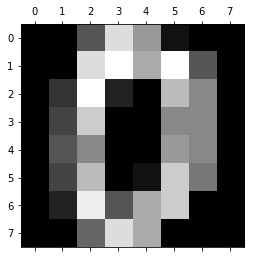

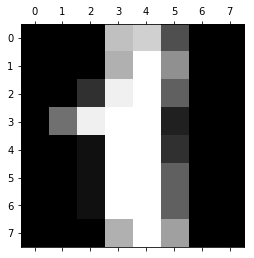

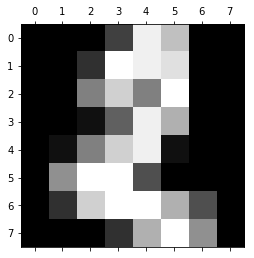

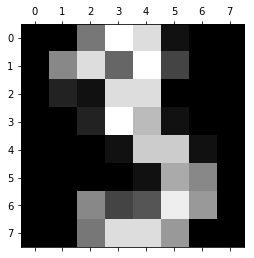

In [27]:
#plt.matshow([[1,2,3,4,5,6,7,8]])
#plt.gray()

#plt.show()
for i in range(4):
    plt.matshow(digits.images[i])
    plt.show()

In [30]:
#SPLITTING TRAIN AND TEST DATASET
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df,digits.target,random_state=42,test_size=0.3)
x_test.shape

(540, 64)

In [5]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

predicted = model.predict(x_test)
actual = y_test

0.9425925925925925


In [31]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(actual,predicted)
print(cm)
print(classification_report(actual,predicted))

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 46  2  0  0  0  0  0  2  0]
 [ 0  0 45  2  0  0  0  0  0  0]
 [ 0  1  0 49  0  0  0  0  3  1]
 [ 0  0  0  0 58  0  0  2  0  0]
 [ 0  0  0  2  0 63  1  0  0  0]
 [ 0  0  0  0  0  0 52  0  1  0]
 [ 0  1  0  0  0  0  0 53  0  1]
 [ 0  2  0  1  0  0  0  0 39  1]
 [ 0  0  1  0  0  1  0  3  3 51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.92      0.92      0.92        50
           2       0.94      0.96      0.95        47
           3       0.91      0.91      0.91        54
           4       1.00      0.97      0.98        60
           5       0.98      0.95      0.97        66
           6       0.98      0.98      0.98        53
           7       0.91      0.96      0.94        55
           8       0.81      0.91      0.86        43
           9       0.94      0.86      0.90        59

   micro avg       0.94      0.94      0.94       540
   macro avg       

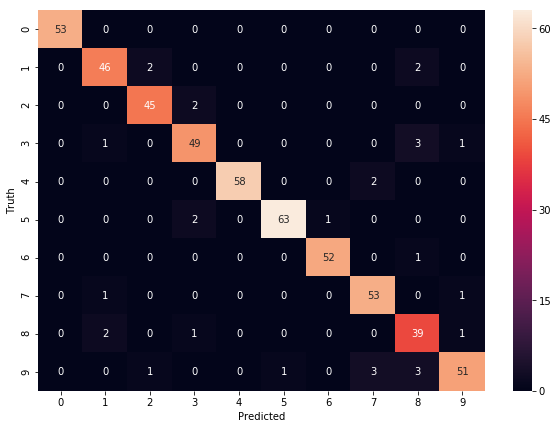

In [33]:
#PLOTTING it as HEATMAP
import seaborn as sns

plt.figure(figsize=(10,7))

sns.heatmap(cm,annot=True)
plt.ylabel("Truth")
plt.xlabel("Predicted")
plt.show()